# Import Libraries & Datasets

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [20]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


# Which hour has the highest frequency of crimes?

In this case, we're going to find the hour of the day with the highest crime frequency.

To solve this problem, we first need to convert the hour from the `TIME OCC` column, which is in a string format (1300) to the hour format (1:00).

In [21]:
# Extract TIME OCC
crimes['Hour OCC'] = crimes['TIME OCC'].str[:2].astype(int)

crimes[['TIME OCC', 'Hour OCC']].head()

,TIME OCC,Hour OCC
0,1110,11
1,1620,16
2,1200,12
3,0635,6
4,0900,9


After we convert it to an hour format, then we can find the peak crime hour by calculating the number of occurrences for each hour in the `Hour OCC` column using the `value_counts` function and the `idxmax` function to identify the hour with the maximum count.

In [22]:
# Peak crime hour
peak_crime_hour = crimes['Hour OCC'].value_counts().idxmax()

crimes['Hour OCC'].value_counts()

Hour OCC
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
21     8701
22     8531
13     8474
10     8440
8      7523
23     7419
9      7092
1      5836
6      5621
7      5403
2      4726
3      3943
4      3238
5      3171
Name: count, dtype: int64

This result shows that `12 PM` was the hour with the highest frequency of crimes, with `13663` cases recorded.

We can also plot it in a line chart to see how the crime frequency changes over the hours of the day and identify the peak hours.

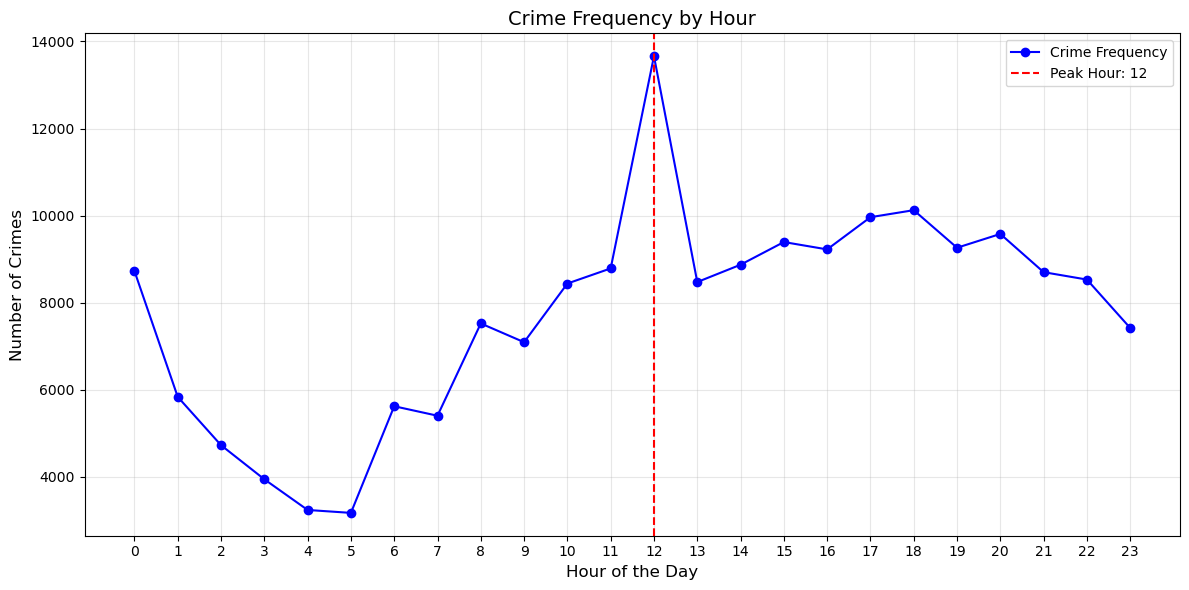

In [23]:
# Value counts for each hour
hourly_counts = crimes['Hour OCC'].value_counts().sort_index()

# Peak crime hour
peak_crime_hour = hourly_counts.idxmax()

# Plotting
plt.figure(figsize=(12, 6))

# Line chart
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', label="Crime Frequency", color='blue')
plt.axvline(x=peak_crime_hour, color='red', linestyle='--', label=f"Peak Hour: {peak_crime_hour}")
plt.title("Crime Frequency by Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()

# Display the chart
plt.show()

# Which area has the largest frequency of night crimes (crimes committed between 10:00 pm and 03:59 am)?

Now, we're going to find the area with the largest night crime frequency. Which were the crimes that were committed between `10:00 PM` and `03:59 AM`

To solve this case, we need to filter the nighttime as defined, from 10:00 PM to 03:59 AM. 

In [24]:
# Peak night crime location (10pm to 3:59am)
night_crimes = crimes[(crimes['Hour OCC'] >= 22) | (crimes['Hour OCC'] < 4)]

display(night_crimes)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour OCC
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,231306158,2023-02-11,2023-02-08,2200,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST,22
185695,231212224,2023-05-17,2023-05-17,2300,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,23
185700,231300825,2023-06-07,2023-06-07,2203,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,22
185701,230908346,2023-04-19,2023-04-18,2243,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV,22


We can see that there are `39,183` crime cases that were committed in this period of time. Now, we just need to count the number of crimes by area using `value_counts` function on the `AREA NAME` column to filter the number of occurrences in each area.


In [25]:
peak_night_crime_location = night_crimes['AREA NAME'].value_counts()
display(peak_night_crime_location)

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: count, dtype: int64

Now, we know that `Central` was the area that had the largest frequency of night crime with the number of `3312` crime cases, which are the crimes that were committed between 10:00 PM and 3:59 AM.

Or to be more specific, we can also use the `idxmax` function to only show the top result.

In [26]:
print(peak_night_crime_location.idxmax())

Central


Additionally, we can visualize it using a bar chart to make it more readable and easily read.

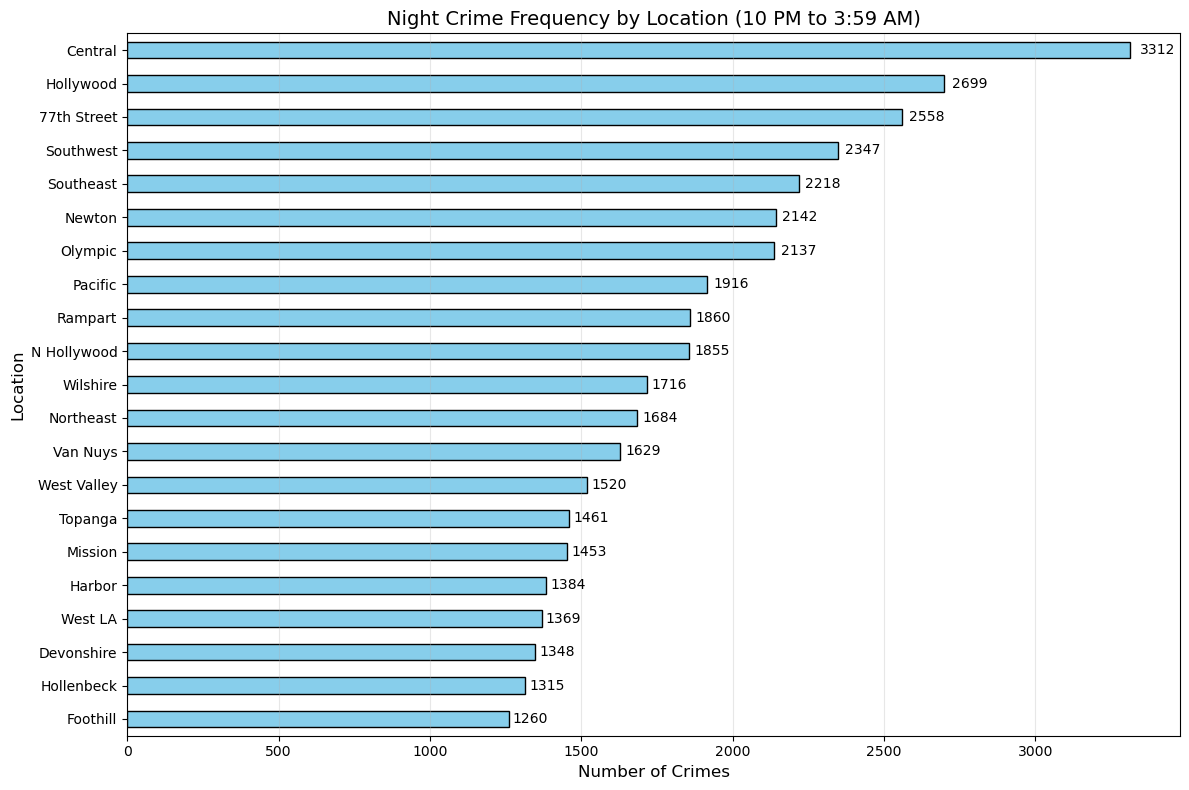

In [27]:
# Sorting the data in descending order
peak_night_crime_location_sorted = peak_night_crime_location.sort_values(ascending=True)

# Plotting a horizontal bar chart with labels on the bars (sorted)
plt.figure(figsize=(12, 8))
bars = peak_night_crime_location_sorted.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels to each bar
for index, value in enumerate(peak_night_crime_location_sorted):
    plt.text(value * 1.01, index, str(value), va='center', fontsize=10)

plt.title("Night Crime Frequency by Location (10 PM to 3:59 AM)", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Display the chart
plt.show()

# Identify the number of crimes committed against victims of different age groups.

This question is similar to the previous one, with the key difference being the variable we're focusing on. In the earlier question, we analyzed the frequency of night crimes based on a specific time range. In this case, however, we will examine the frequency of night crimes across different age groups.

Before proceeding with further analysis, we first need to group the ages into intervals. For this case, we will use the following intervals: `["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]`.

In [28]:
# Victim ages grouped
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

After that, we can use the `cut` function from pandas to assign each victim's age to an appropriate group based on the `Vict Age` column.

In [34]:
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

display(crimes['Age Group'])

0         26-34
1         55-64
2         26-34
3         35-44
4           65+
          ...  
185710    18-25
185711    18-25
185712    18-25
185713    26-34
185714    45-54
Name: Age Group, Length: 185715, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']

Now, we can calculate the number of crimes in each age group using the `value_counts` function. To ensure all age groups are displayed, even if some have no recorded crimes, we can use the `reindex` function.

In [32]:
victim_ages = crimes['Age Group'].value_counts().reindex(age_labels, fill_value=0)

display(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64

Let's plot it in a column chart to make it easily read.

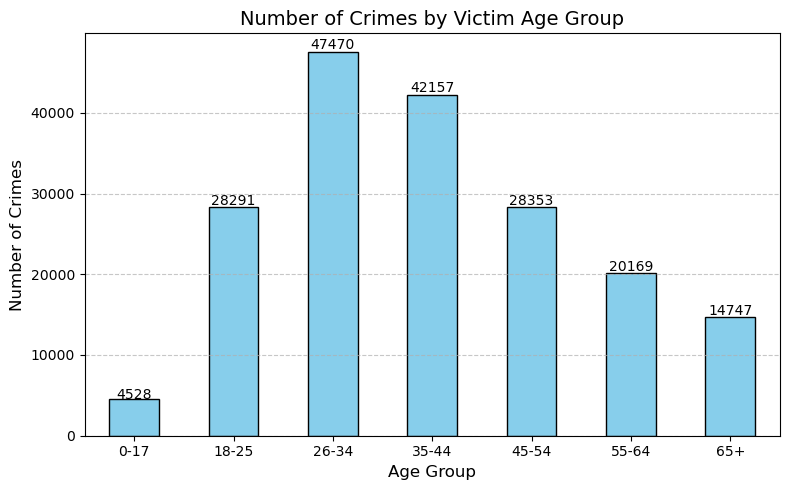

In [ ]:
# Visualize the number of crimes committed against victims of different age groups
plt.figure(figsize=(8, 5))
ax = victim_ages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Crimes by Victim Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for i in range(len(victim_ages)):
    ax.text(i, victim_ages.iloc[i] * 1.01, str(victim_ages.iloc[i]), ha='center', fontsize=10)

plt.tight_layout()

plt.show()

We see that the age group `26-34` has the highest number of crime cases, with a total of `47,470` recorded crimes, compared to the other age groups.